In [1]:
import pandas as pd

In [2]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [3]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [4]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,vs211681_2013_09_03_173153_ccs,63.065272,1.297921,19.291421,8.292576,4.725014,10.024487,3.959786,0.912599,vs211681
1,r11_2013_11_04_154730_ccs,68.281416,0.332035,13.403361,4.923663,3.404032,3.537709,0.006404,2.946240,r11
2,jsc1466_2013_09_19_142647_ccs,55.658577,2.041760,13.557771,12.362917,4.407038,10.516578,4.504440,1.691757,jsc1466
3,jsc1421_2013_09_12_210811_ccs,57.805043,1.303322,12.553033,8.596109,5.438566,8.916778,2.763317,2.385988,jsc1421
4,mc_2013_10_24_141939_ccs,56.101376,0.876215,17.127064,7.987324,5.016072,0.077997,0.470357,3.348095,mc


In [5]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [6]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [7]:
aligned_pred_PLS_SM, aligned_pred_ICA = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [8]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
nau2los_2013_08_19_194625_ccs,nau2los,47.440441,0.693664,10.872668,14.063425,1.530916,5.789476,1.175003,0.276645
gl4mt_2013_10_17_154337_ccs,gl4mt,62.950915,0.818299,21.366762,3.273397,1.297310,0.040876,0.281269,6.906964
dkm390_2013_10_08_162221_ccs,dkm390,68.822818,0.419373,12.705305,7.014497,1.779561,1.347307,2.462519,1.720731
gbw07104_2013_08_07_141521_ccs,gbw07104,58.710386,0.835789,15.595282,6.165567,1.850919,6.261673,3.748823,2.177230
jsc1426_2013_09_16_151528_ccs,jsc1426,41.549879,0.125740,2.732420,48.683289,0.817992,1.240916,0.415809,0.102025
g7mt_2013_10_16_160000_ccs,g7mt,62.802000,0.547210,16.692987,5.485954,2.745573,1.496102,4.121748,2.923434
jsc1440_2013_09_17_135358_ccs,jsc1440,46.683742,0.343101,28.875697,1.427903,0.493589,14.632538,6.464061,-0.118689
g22mt_2013_10_09_154657_ccs,g22mt,57.251715,0.795681,17.349875,6.911766,3.977626,1.233551,4.077688,2.323990
s3a_2013_11_05_152104_ccs,s3a,61.568811,1.135358,20.146508,6.188287,2.371037,-0.206742,0.417703,5.037457


In [9]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [10]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,49.331282,0.876304,11.416318,13.378277,1.689792,5.936768,1.938940,1.288814,nau2los,nau2los_2013_08_19_194625_ccs
1,64.568071,0.627265,19.897502,3.729847,0.858259,0.958592,1.283780,5.424006,gl4mt,gl4mt_2013_10_17_154337_ccs
2,63.247962,0.675953,12.620581,7.633865,1.871154,2.870911,2.928297,2.043633,dkm390,dkm390_2013_10_08_162221_ccs
3,56.659459,0.499675,14.997653,5.197498,4.195748,7.051013,3.157850,2.395494,gbw07104,gbw07104_2013_08_07_141521_ccs
4,50.712583,-0.044306,2.958596,41.528198,0.178111,2.048923,2.502020,1.394120,jsc1426,jsc1426_2013_09_16_151528_ccs
5,62.597621,0.281304,17.183404,5.748839,1.247300,0.359352,3.614449,3.544167,g7mt,g7mt_2013_10_16_160000_ccs
6,47.274784,0.027840,27.581400,0.811932,4.215239,15.138554,4.787289,1.156245,jsc1440,jsc1440_2013_09_17_135358_ccs
7,59.282606,0.954372,16.815641,7.466370,3.337179,2.029428,4.714301,2.363170,g22mt,g22mt_2013_10_09_154657_ccs
8,57.886061,1.172560,20.422710,5.730565,3.134740,1.104362,0.929842,4.890990,s3a,s3a_2013_11_05_152104_ccs
9,45.160753,2.611303,14.180571,12.823213,5.367027,11.464589,3.319538,0.538641,jsc1390,jsc1390_2013_09_10_190948_ccs


In [11]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [12]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [13]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

In [14]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,51.222122,47.440441,nau2los,43.78,49.331282
1,66.185228,62.950915,gl4mt,54.32,64.568071
2,57.673106,68.822818,dkm390,72.1,63.247962
3,54.608532,58.710386,gbw07104,60.62,56.659459
4,59.875288,41.549879,jsc1426,19.3,50.712583


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

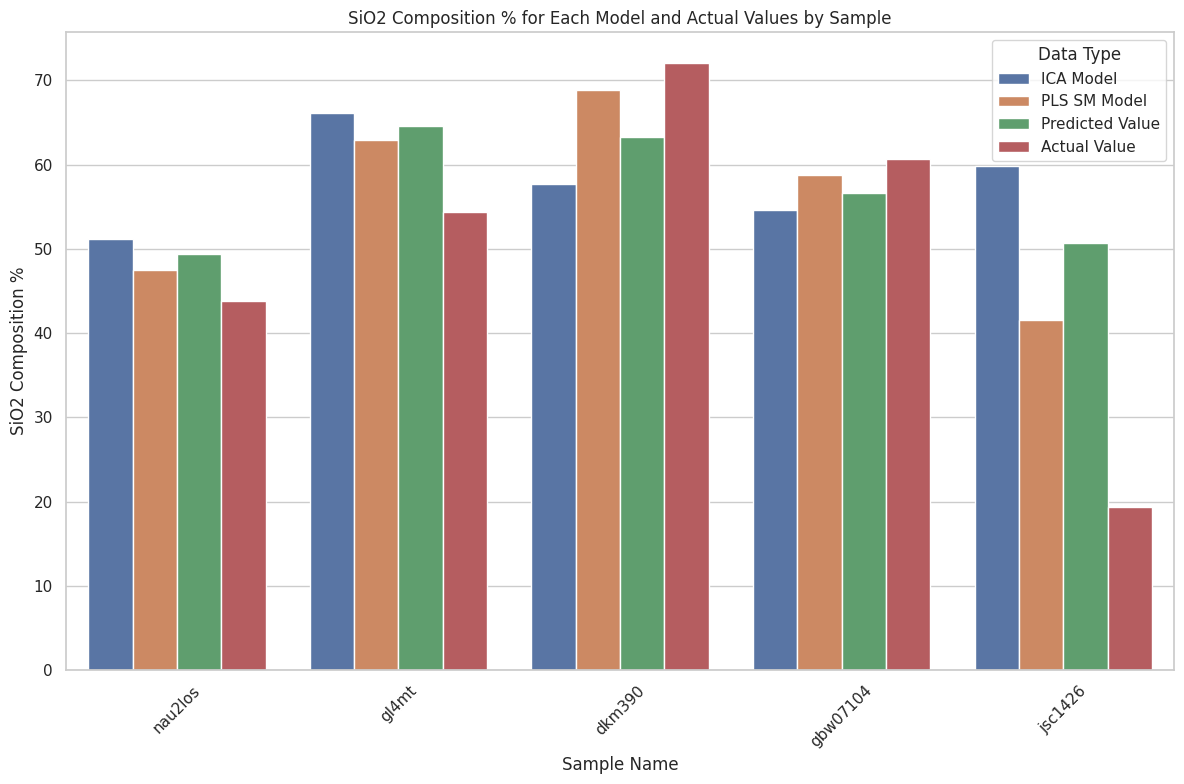

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [16]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,49.331282,43.78,0.876304,0.78,11.416318,7.63,13.378277,18.28,1.689792,2.97,5.936768,8.26,1.938940,1.44,1.288814,0.4,nau2los
1,64.568071,54.32,0.627265,0.52,19.897502,23.28,3.729847,5.16,0.858259,1.83,0.958592,0.14,1.283780,0.11,5.424006,8.88,gl4mt
2,63.247962,72.1,0.675953,0.43,12.620581,12.10,7.633865,3.16,1.871154,1.51,2.870911,1.36,2.928297,2.34,2.043633,2.03,dkm390
3,56.659459,60.62,0.499675,0.52,14.997653,16.17,5.197498,4.41,4.195748,1.72,7.051013,5.20,3.157850,3.86,2.395494,1.89,gbw07104
4,50.712583,19.3,-0.044306,0.08,2.958596,1.49,41.528198,65.85,0.178111,0.77,2.048923,0.77,2.502020,0.45,1.394120,0.16,jsc1426
5,62.597621,61.6,0.281304,0.62,17.183404,16.11,5.748839,6.08,1.247300,2.81,0.359352,0.91,3.614449,4.66,3.544167,2.98,g7mt
6,47.274784,48.22,0.027840,0.04,27.581400,31.99,0.811932,0.40,4.215239,0.23,15.138554,15.33,4.787289,2.66,1.156245,0.04,jsc1440
7,59.282606,57.03,0.954372,0.79,16.815641,18.71,7.466370,7.65,3.337179,3.97,2.029428,1.14,4.714301,5,2.363170,2.27,g22mt
8,57.886061,59.3,1.172560,0.8,20.422710,21.30,5.730565,6.71,3.134740,2.21,1.104362,0.05,0.929842,0.13,4.890990,4.5,s3a
9,45.160753,47.31,2.611303,3.2,14.180571,13.17,12.823213,13.25,5.367027,5.74,11.464589,10.48,3.319538,2.63,0.538641,0.73,jsc1390


In [17]:
moc_rmse_values

{'SiO2': 10.652867434365051,
 'TiO2': 0.2724641895938811,
 'Al2O3': 2.248590370416276,
 'FeOT': 7.712591532689466,
 'MgO': 1.630989865370904,
 'CaO': 1.231257924983369,
 'Na2O': 1.1302159346779341,
 'K2O': 1.253432388214638}

In [18]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 14.245997486849443,
 'TiO2': 0.42234154980275135,
 'Al2O3': 4.233784857126785,
 'FeOT': 14.20921117399125,
 'MgO': 3.0736753810657516,
 'CaO': 2.0617856858306927,
 'Na2O': 1.5232002870957417,
 'K2O': 1.4988362732499578}

In [19]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
nau2los_2013_08_19_194625_ccs,47.440441,43.78,0.693664,0.78,10.872668,7.63,14.063425,18.28,1.530916,2.97,5.789476,8.26,1.175003,1.44,0.276645,0.4,nau2los
gl4mt_2013_10_17_154337_ccs,62.950915,54.32,0.818299,0.52,21.366762,23.28,3.273397,5.16,1.297310,1.83,0.040876,0.14,0.281269,0.11,6.906964,8.88,gl4mt
dkm390_2013_10_08_162221_ccs,68.822818,72.1,0.419373,0.43,12.705305,12.10,7.014497,3.16,1.779561,1.51,1.347307,1.36,2.462519,2.34,1.720731,2.03,dkm390
gbw07104_2013_08_07_141521_ccs,58.710386,60.62,0.835789,0.52,15.595282,16.17,6.165567,4.41,1.850919,1.72,6.261673,5.20,3.748823,3.86,2.177230,1.89,gbw07104
jsc1426_2013_09_16_151528_ccs,41.549879,19.3,0.125740,0.08,2.732420,1.49,48.683289,65.85,0.817992,0.77,1.240916,0.77,0.415809,0.45,0.102025,0.16,jsc1426
g7mt_2013_10_16_160000_ccs,62.802000,61.6,0.547210,0.62,16.692987,16.11,5.485954,6.08,2.745573,2.81,1.496102,0.91,4.121748,4.66,2.923434,2.98,g7mt
jsc1440_2013_09_17_135358_ccs,46.683742,48.22,0.343101,0.04,28.875697,31.99,1.427903,0.40,0.493589,0.23,14.632538,15.33,6.464061,2.66,-0.118689,0.04,jsc1440
g22mt_2013_10_09_154657_ccs,57.251715,57.03,0.795681,0.79,17.349875,18.71,6.911766,7.65,3.977626,3.97,1.233551,1.14,4.077688,5,2.323990,2.27,g22mt
s3a_2013_11_05_152104_ccs,61.568811,59.3,1.135358,0.8,20.146508,21.30,6.188287,6.71,2.371037,2.21,-0.206742,0.05,0.417703,0.13,5.037457,4.5,s3a
jsc1390_2013_09_10_190948_ccs,47.766317,47.31,2.720042,3.2,14.332784,13.17,12.904779,13.25,5.764592,5.74,9.800865,10.48,3.070697,2.63,0.793853,0.73,jsc1390


In [20]:
PLS_SM_rmses

{'SiO2': 7.426285570344327,
 'TiO2': 0.24718137308459665,
 'Al2O3': 1.6840007341354712,
 'FeOT': 5.633105430027699,
 'MgO': 0.484604688684234,
 'CaO': 0.8973409817735412,
 'Na2O': 1.2122689338692396,
 'K2O': 0.6574037121596448}

In [21]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA", "PLS_SM", "MOC"])

In [22]:
RMSEs_df.T

,ICA,PLS_SM,MOC
SiO2,14.245997,7.426286,10.652867
TiO2,0.422342,0.247181,0.272464
Al2O3,4.233785,1.684001,2.248590
FeOT,14.209211,5.633105,7.712592
MgO,3.073675,0.484605,1.630990
CaO,2.061786,0.897341,1.231258
Na2O,1.523200,1.212269,1.130216
K2O,1.498836,0.657404,1.253432


In [23]:
# find moc prediction for sample name including the word "nau2"
nau2los_moc_df = merged_moc_actual_df[merged_moc_actual_df['Sample Name'].str.contains("nau2")]

# calculate rmse 
calculate_rmse(nau2los_moc_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 5.551281530658571,
 'TiO2': 0.0963039621694719,
 'Al2O3': 3.786318365848918,
 'FeOT': 4.901723449679238,
 'MgO': 1.2802079058648133,
 'CaO': 2.3232317672741267,
 'Na2O': 0.4989403318587955,
 'K2O': 0.8888142403656402}